<a href="https://colab.research.google.com/github/AhmedMinerva/Practical_DataScience/blob/master/Kaggle_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libraries 

import re
import pandas as pd
from matplotlib import pyplot
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

sns.set()
%matplotlib inline

In [ ]:
#load the data from my drive 
df_train = pd.read_csv('drive/Shared drives/House_Prices/train.csv')
df_test = pd.read_csv('drive/Shared drives/House_Prices/test.csv')

#make copy of the data and save it as original
train_original=df_train.copy()
test_original=df_test.copy()

#check the data columns
print(df_train.columns)
#check the shape of the DataFrame (rows, columns)
print(df_train.shape)

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# display the first 5 rows of the data
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Introduction

This is a kaggle competition to predict the sales price of each home, given the home properties.

What are the features?

*   79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa
*   1 Id variable for each house

What is the response?

*   Sales Price

What else do we know?

*   By looking to the data above, we can notice that there are two types of variables values: 'numerical' or 'categorical'. By 'numerical' we mean variables for which the values are numbers, and by 'categorical' we mean variables for which the values are categories.

*   Some of the values are just "NaN" because the house doesn't have this specific feature

In [ ]:
#Let's dig deeper to understand the Sales Price better 
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.882876


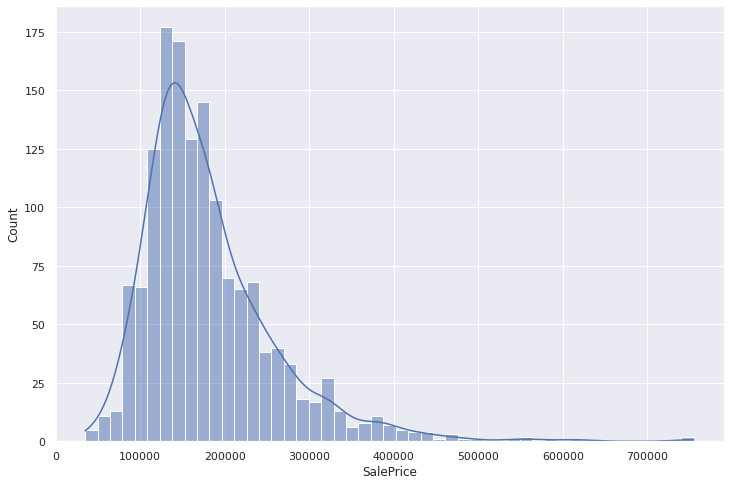

In [ ]:
#histogram
dims = (12, 8)
fig, ax = plt.subplots(figsize=dims)
sns.histplot(ax=ax, data=df_train['SalePrice'],kde=True)
#skewness
print("Skewness: %f" % df_train['SalePrice'].skew())

From the two cells above, we understand that:

*   All sale-prices are positive, so we don't need to drop any value (Who will buy a house without paying!!) 
*   The SalePrice histogram has positive skewness. Positive Skewness happens when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode 
*   Houses in SF are expensive, and this was a couple of years ago!!

---



# Relationship with numerical variables

Now let's look to the other variables and choose the most relevant ones because 79 are a lot!!

--> Go and read the data description file on the shared drive

From reading and understanding the data description, I got interested in a couple of variables that might influence the sales price: 

1. Numerical

*   LotArea: Lot size in square feet
*   GarageArea: Size of garage in square feet
*   TotalBsmtSF: Total square feet of basement area


2. Categorical

*   Utilities: Type of utilities available
*   Neighborhood: Physical locations within Ames city limits
*   BldgType: Type of dwelling
*   OverallQual: Rates the overall material and finish of the house
*   LYearBuilt: Original construction date

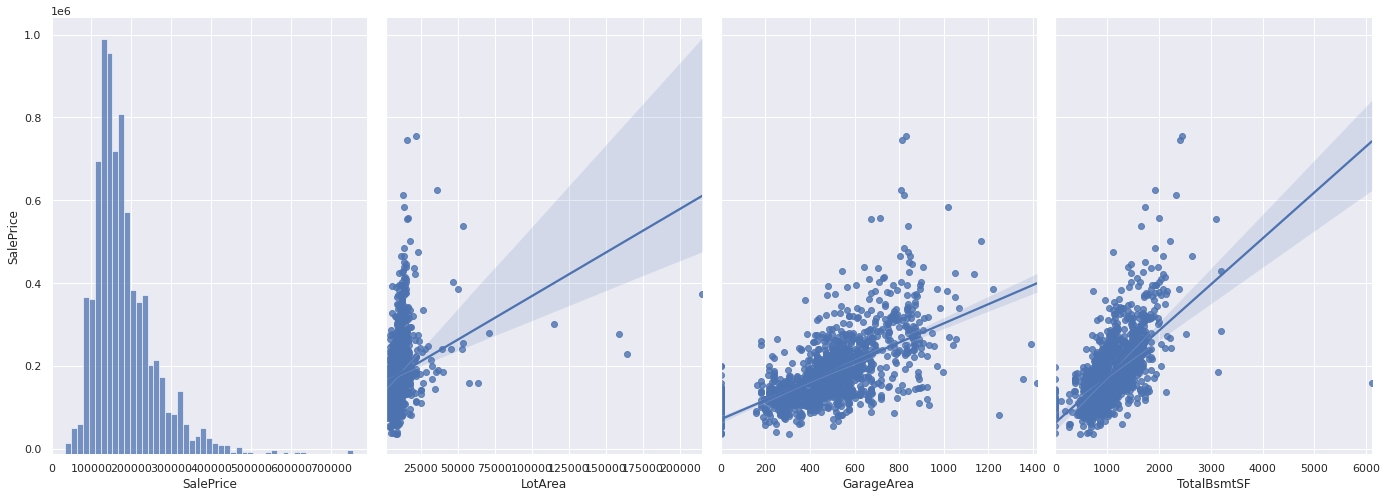

In [ ]:
# Relationship with numerical variables
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df_train, x_vars=['SalePrice','LotArea','GarageArea','TotalBsmtSF'], y_vars=['SalePrice'], height=7, aspect=0.7, kind='reg')

In [ ]:
# get coeffs of linear fit and print the regression equation for each variable 

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df_train['LotArea'],df_train['SalePrice'])
print("LotArea: y={0:.1f}x+{1:.1f}".format(slope,intercept))

slope, intercept, r_value, p_value, std_err = stats.linregress(df_train['GarageArea'],df_train['SalePrice'])
print("GarageArea: y={0:.1f}x+{1:.1f}".format(slope,intercept))

slope, intercept, r_value, p_value, std_err = stats.linregress(df_train['TotalBsmtSF'],df_train['SalePrice'])
print("TotalBsmtSF: y={0:.1f}x+{1:.1f}".format(slope,intercept))

LotArea: y=2.1x+158836.2
GarageArea: y=231.6x+71357.4
TotalBsmtSF: y=111.1x+63430.6


As we can see above, there is a good linear relationship between (GarageArea-TotalBsmtSF) and (SalePrice). 

So let's start exploring the categorial variables:

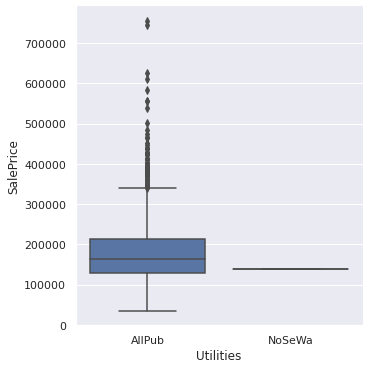

In [ ]:
#box plot Utilities/saleprice
sns.catplot(x=df_train["Utilities"], y=df_train['SalePrice'], kind="box", data=df_train)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


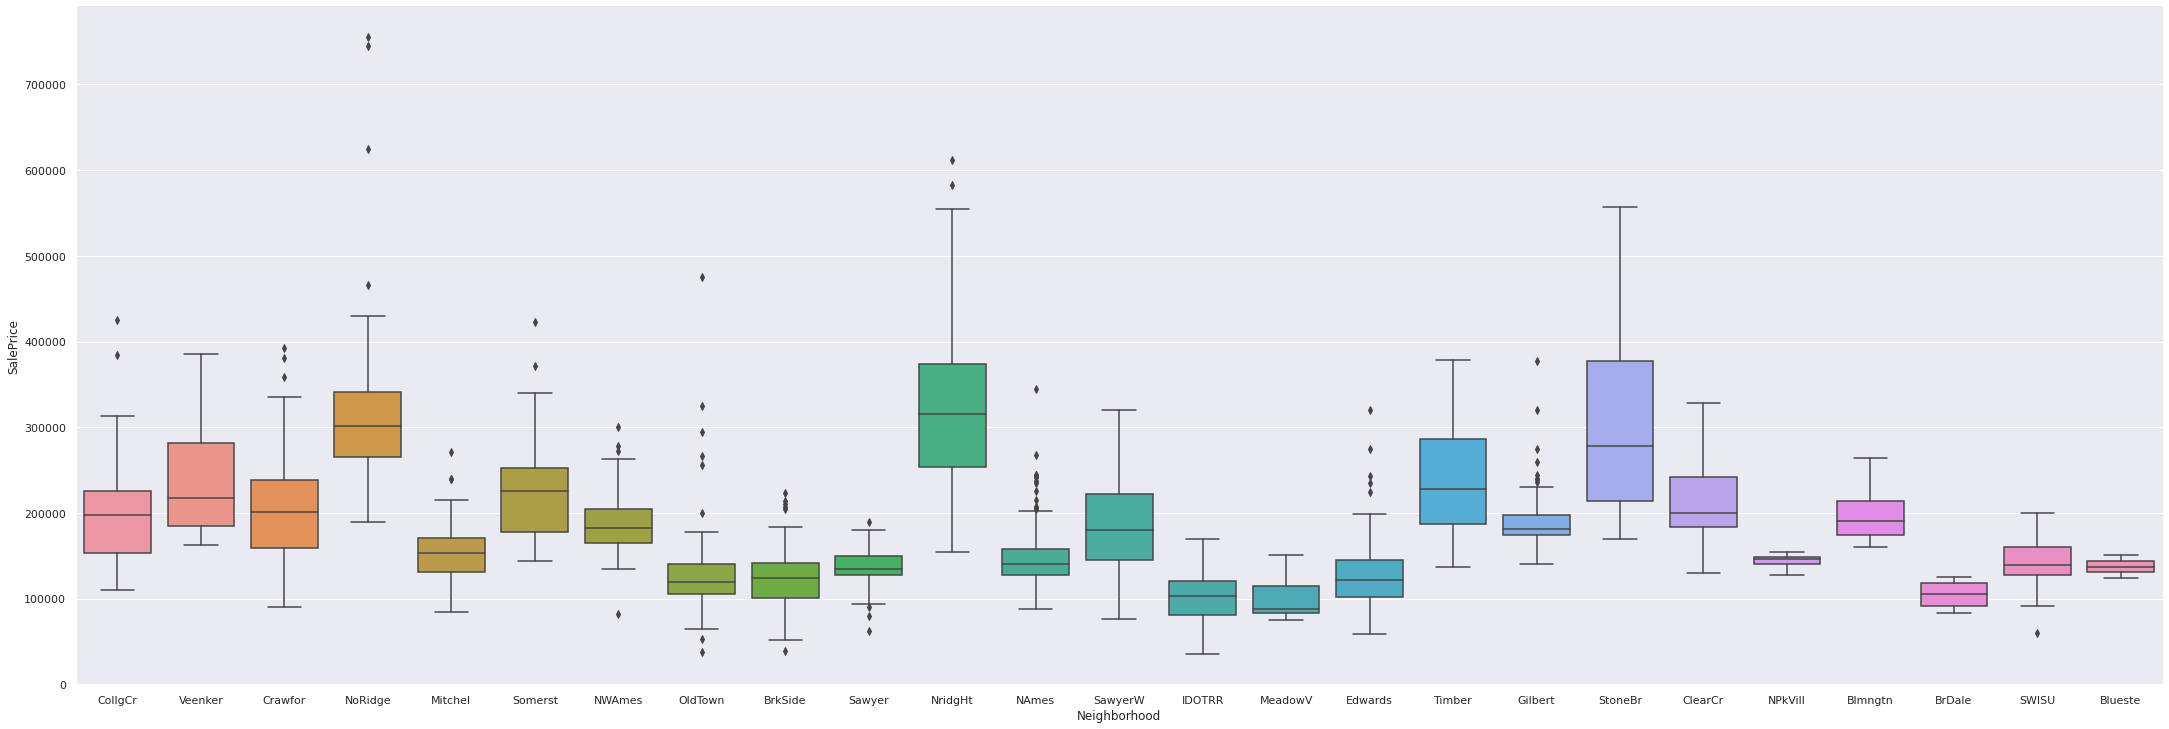

In [ ]:
#box plot Neighborhood/saleprice
sns.catplot(ax=ax, x=df_train["Neighborhood"], y=df_train['SalePrice'], kind="box", data=df_train, height=10, aspect=3)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


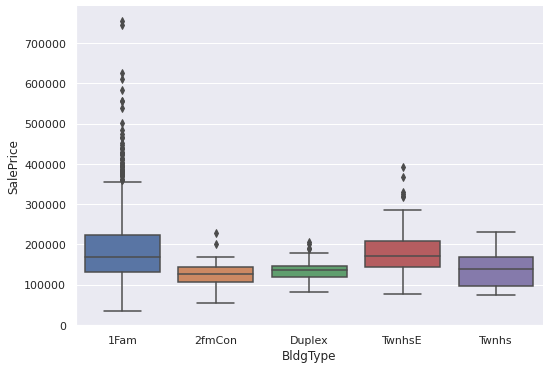

In [ ]:
#box plot BldgType/saleprice
sns.catplot(ax=ax, x=df_train["BldgType"], y=df_train['SalePrice'], kind="box", data=df_train,height=5,aspect=1.5)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


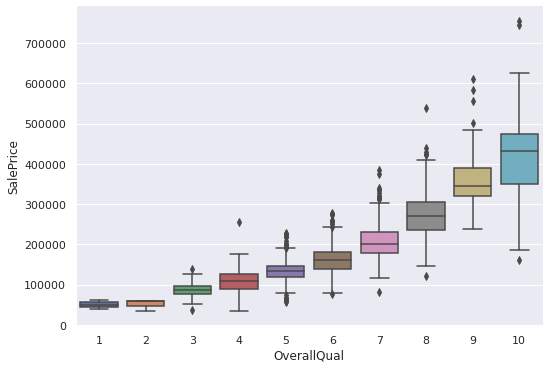

In [ ]:
# height=10, aspect=3
#box plot OverallQual/saleprice
sns.catplot(ax=ax, x=df_train["OverallQual"], y=df_train['SalePrice'], kind="box", data=df_train, height=5,aspect=1.5)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


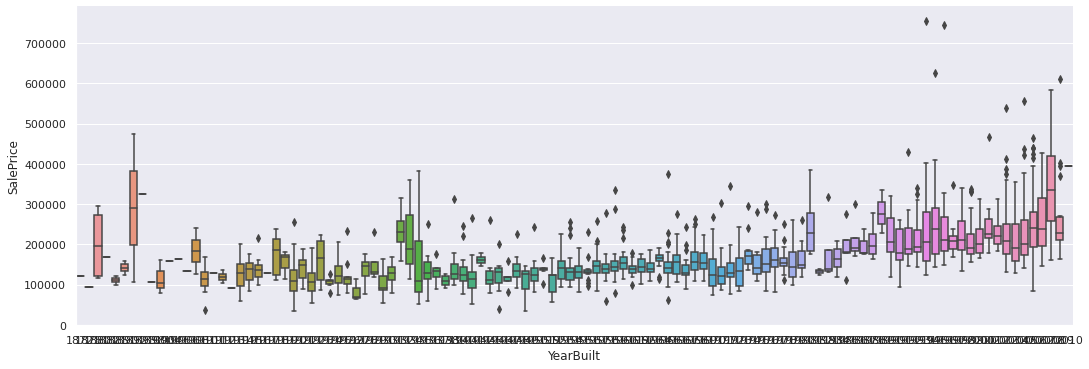

In [ ]:
#box plot YearBuilt/saleprice
sns.catplot(ax=ax, x=df_train["YearBuilt"], y=df_train['SalePrice'], kind="box", data=df_train, height=5,aspect=3)

As we can see above, there is a good relationship between (BldgType-OverallQual) and (SalePrice). So, we can ignore the three other categorial variables as they are not really relevant. 

The chosen variables are mainly chosen based on a subjective understanding of the data description, so let's look into a heatmap and see the other variables that might have a strong correlation with "SalesPrice":

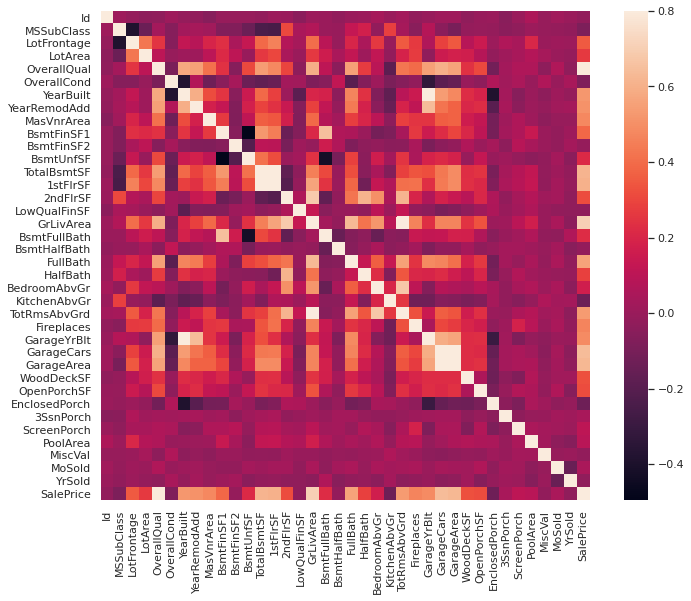

In [ ]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

Looking at the last row of the heat map above, we can see that in addition to the variables discussed above there are other variables that are correlated to 'SalePrice': 

*   GrLive Area
*   1stFlrSF

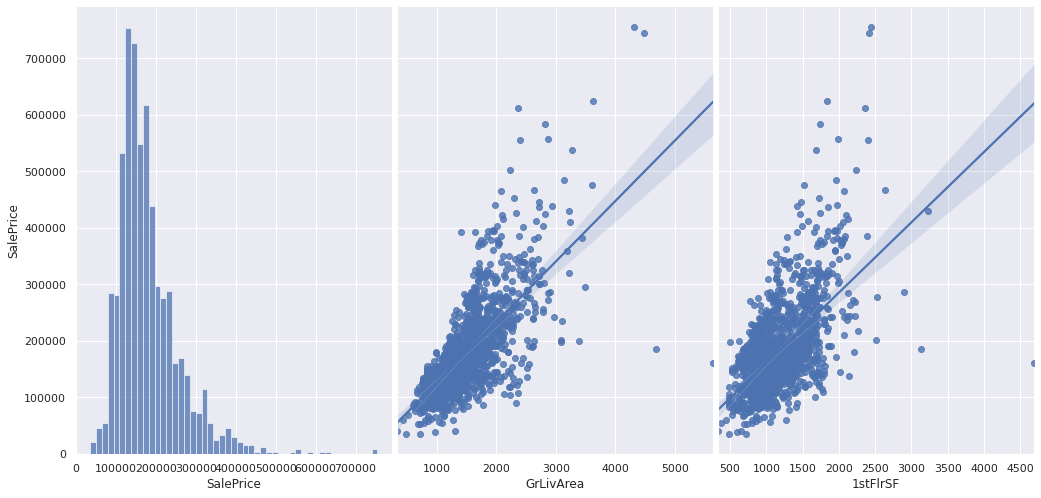

In [ ]:
# Relationship with numerical variables
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df_train, x_vars=['SalePrice','GrLivArea','1stFlrSF'], y_vars=['SalePrice'], height=7, aspect=0.7, kind='reg')

In [ ]:
# get coeffs of linear fit and print the regression equation for each variable 

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df_train['GrLivArea'],df_train['SalePrice'])
print("GrLivArea: y={0:.1f}x+{1:.1f}".format(slope,intercept))

slope, intercept, r_value, p_value, std_err = stats.linregress(df_train['1stFlrSF'],df_train['SalePrice'])
print("1stFlrSF: y={0:.1f}x+{1:.1f}".format(slope,intercept))

GrLivArea: y=107.1x+18569.0
1stFlrSF: y=124.5x+36173.4



From the analysis above, I can suggest a couple of variables to be strongly related to the 'SalePrice':

1. Numerical

*   GarageArea: Size of garage in square feet
*   TotalBsmtSF: Total square feet of basement area
*   1stFlrSF: First Floor square feet
*   GrLivArea: Above grade (ground) living area square feet

2. Categorical

*   OverallQual: Rates the overall material and finish of the house
*   LYearBuilt: Original construction date


# Missing Data

I have noticed that all missing data are coming from trivial values that don't really influence the SalesPrice. So, I haven't dropped any missing data yet but feel free to do that if you need!! 

In [ ]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


# Feel free to start building your models now

Let me know if you need any help !! 

# PCA Decomposition


In [ ]:
#Test/Train Split - We don't have the prices for the test data, so I had to
#split the train data into two!
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train.loc[:, df_train.columns != 'SalePrice'], df_train['SalePrice'], test_size=0.25, random_state=42)

In [ ]:
#Creating Price Categories for TSNE and PCA Visualization!! We may want to use
#this in training classification models as well
def what_bracket(sale_price):
  if sale_price <=100000:
    return "Tier 1"
  elif sale_price <=200000:
    return "Tier 2"
  elif sale_price <=300000:
    return "Tier 3"
  elif sale_price <= 500000:
    return "Tier 4"
  else:
    return "Tier 5"

y_train = pd.DataFrame(y_train, columns = ["SalePrice"])
new_col = y_train['SalePrice'].apply(what_bracket)

y_train['Price_Tier'] = new_col

In [ ]:
#Dealing with categorical variables by getting dummies
dummies_train = pd.get_dummies(X_train)
dummies_test = pd.get_dummies(X_test)

means = {"LotFrontage":70.05, "MasVnrArea":103.69, "GarageYrBlt":1978}

#Filling in NA values with the mean of their column (for the three variables
#above, Lot Frontage, masVnrArea and GarageYrBlt)
foo = dummies_train.fillna(value=means)
foo = foo.loc[:, foo.columns != 'SalePrice']
foo = foo.loc[:, foo.columns != 'Price_Tier']

foo_test = dummies_test.fillna(value=means)
foo_test = foo_test.loc[:, foo_test.columns != 'SalePrice']
foo_test = foo_test.loc[:, foo_test.columns != 'Price_Tier']

In [ ]:
#Here I decompose each image into 50 principal components
from sklearn.decomposition import PCA

def pca_dec(data, n):
  pca = PCA(n)
  X_dec = pca.fit_transform(data)
  return X_dec, pca

#Decomposing the train set:
pca_train_results, pca_train = pca_dec(foo, 10)

#Decomposing the test set:
pca_test_results, pca_test = pca_dec(foo_test, 10)

#Creating a table with the explained variance ratio
names_pcas = [f"PCA Component {i}" for i in range(1, 11, 1)]
scree = pd.DataFrame(list(zip(names_pcas, pca_train.explained_variance_ratio_)), columns=["Component", "Explained Variance Ratio"])
print(scree)

          Component  Explained Variance Ratio
0   PCA Component 1                  0.987204
1   PCA Component 2                  0.004059
2   PCA Component 3                  0.002793
3   PCA Component 4                  0.002308
4   PCA Component 5                  0.001453
5   PCA Component 6                  0.000858
6   PCA Component 7                  0.000399
7   PCA Component 8                  0.000250
8   PCA Component 9                  0.000228
9  PCA Component 10                  0.000166


Text(0, 0.5, 'Explained Variance Ratio')

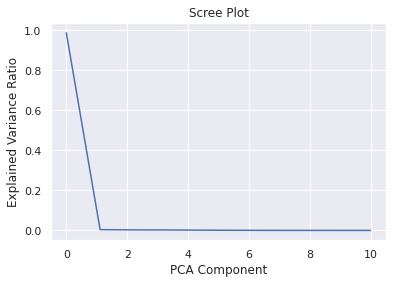

In [ ]:
#Creating a scree plot:
xs = np.linspace(0, 10, 10)

plt.plot(xs, pca_train.explained_variance_ratio_)
plt.title("Scree Plot")
plt.xlabel("PCA Component")
plt.ylabel("Explained Variance Ratio")

Text(0, 0.5, 'PCA Component 2')

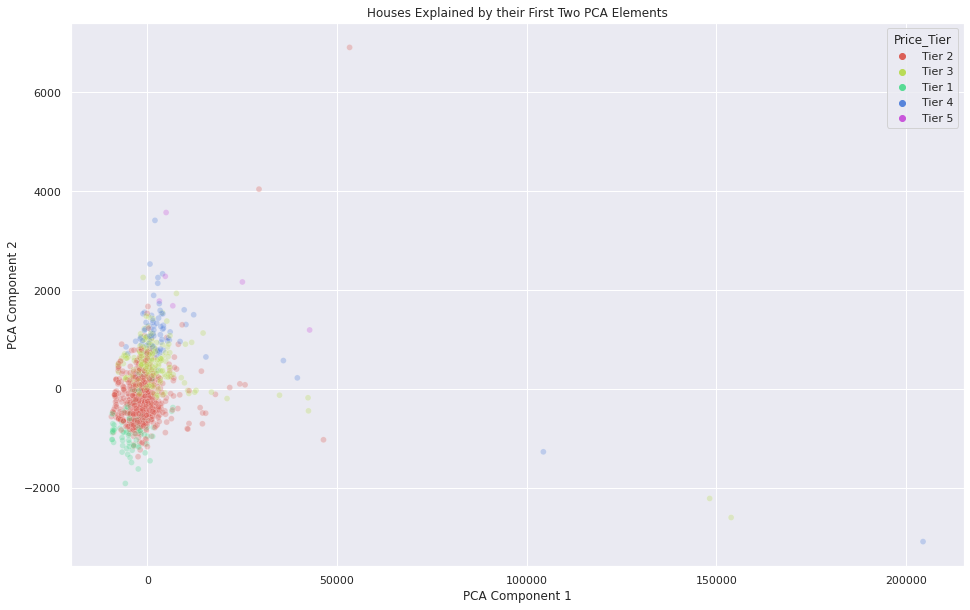

In [ ]:
#Plotting the first two PCA components, as well as the price tier of the house
#to see if PCA helps us distinguish price-points

import seaborn as sns
import matplotlib.pyplot as plt

first_comps = pca_train_results[:,0] #Taking the first PCA component for each
                                    #decomposed house's data

second_comps = pca_train_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=first_comps, y=second_comps,
    hue=y_train["Price_Tier"],
    palette=sns.color_palette("hls", 5),
    legend="full",
    alpha=0.3
)

plt.title("Houses Explained by their First Two PCA Elements")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")


# TSNE Decomposition

In [ ]:
from sklearn.manifold import TSNE

#Decomposing the data with TSNE, onto 2 dimensions
tsne_train = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_train_results = tsne_train.fit_transform(foo)

tsne_test = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_test_results = tsne_test.fit_transform(foo_test)

Text(0.5, 1.0, 'T-SNE Decomposed Data')

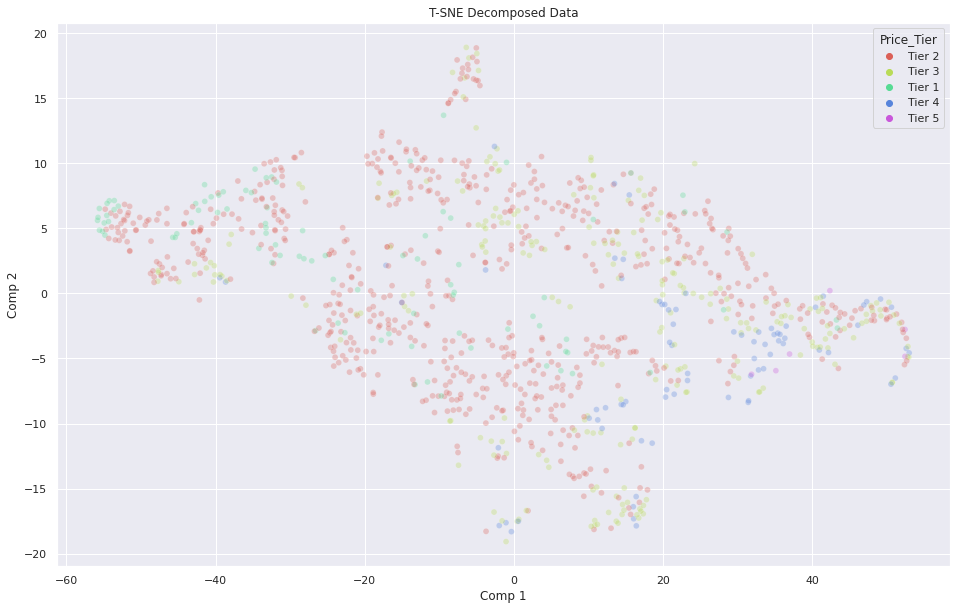

In [ ]:
#Plotting the data as explained by the two TSNE components
first_tsne = tsne_train_results[:,0]
second_tsne = tsne_train_results[:,1]

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(16,10))
sns.scatterplot(
    x=first_tsne, y=second_tsne,
    hue=y_train["Price_Tier"],
    palette=sns.color_palette("hls", 5),
    legend="full",
    alpha=0.3
)
plt.xlabel("Comp 1")
plt.ylabel("Comp 2")
plt.title("T-SNE Decomposed Data")

# Testing Decomposition Performance with SVR Models

# SVR Model - PCA

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

PCA_SVR_model = SVR()
PCA_SVR_model.fit(pca_train_results, y_train['SalePrice'])

y_pred = PCA_SVR_model.predict(pca_test_results)
print(mean_squared_error(y_test, y_pred))

7184007266.223966


## SVR Model - TSNE

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

TSNE_SVR_model = SVR()
TSNE_SVR_model.fit(tsne_train_results, y_train['SalePrice'])

y_pred = TSNE_SVR_model.predict(tsne_test_results)
print(mean_squared_error(y_test, y_pred))

7181736335.132636


In [ ]:
type(y_test)


pandas.core.series.Series

### Important PCA and TSNE related variables I produced:
- pca_train_results: this represents the around 1000 houses now described by 10 features (the 10 Principal Components). This is an ndarray of shape (1095, 10).
- y_train: this is a Data Frame with two columns: first, the "Sale Price" corresponding to the sale price of the houses in the pca_train_results and tsne_train_results data. The second column, "Price_Tier", is a classification of the prices into 5 tiers ranging from chapest "Tier 1" to most expensive "Tier 5".
- tsne_train_results: this represents the around 1000 houses now described by 2 featers (the two components of the TSNE decomposition). This is an ndarray of shape (1095, 2).
- pca_test_results: this is the pca-decomposed test set data. It is an ndarray of shape (365, 10).
- tsne_test_results: this is the tsne-decomposed test set data. It is an ndarray of shape (365, 2).
- y_test: this is a pandas series object with the prices for the houses in the pca_test_results and tsne_test_results data.

Also note: I left the df_train and df_test dataframes, with all the original data Ahmed was using, untouched and unchanged in case you want to look at the original data!

# Deep Neural Network Models start here 


In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import itertools
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


train = df_train
print('Shape of the train data with all features:', train.shape)
train = train.select_dtypes(exclude=['object'])
print("")
print('Shape of the train data with numerical features:', train.shape)
train.drop('Id',axis = 1, inplace = True)
train.fillna(0,inplace=True)

test = df_test
test = test.select_dtypes(exclude=['object'])
ID = test.Id
test.fillna(0,inplace=True)
test.drop('Id',axis = 1, inplace = True)

print("")
print("List of features contained our dataset:",list(train.columns))

Shape of the train data with all features: (1460, 81)

Shape of the train data with numerical features: (1460, 38)

List of features contained our dataset: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
# outliers
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(train)
y_noano = clf.predict(train)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

train = train.iloc[y_noano[y_noano['Top'] == 1].index.values]
train.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", train.shape[0])

Number of Outliers: 139
Number of rows without outliers: 1321


In [ ]:
import warnings
warnings.filterwarnings('ignore')

col_train = list(train.columns)
col_train_bis = list(train.columns)

col_train_bis.remove('SalePrice')

mat_train = np.matrix(train)
mat_test  = np.matrix(test)
mat_new = np.matrix(train.drop('SalePrice',axis = 1))
mat_y = np.array(train.SalePrice).reshape((1321,1))

prepro_y = MinMaxScaler()
prepro_y.fit(mat_y)

prepro = MinMaxScaler()
prepro.fit(mat_train)

prepro_test = MinMaxScaler()
prepro_test.fit(mat_new)

train = pd.DataFrame(prepro.transform(mat_train),columns = col_train)
test  = pd.DataFrame(prepro_test.transform(mat_test),columns = col_train_bis)

train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.235294,0.207668,0.062802,0.625,0.428571,0.953488,0.883333,0.12250,0.416274,0.0,0.070721,0.266999,0.200384,0.530106,0.0,0.461538,0.333333,0.0,0.666667,0.5,0.500000,0.0,0.555556,0.000000,0.996517,0.50,0.394245,0.000000,0.167582,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.403057
1,0.000000,0.255591,0.072904,0.500,0.857143,0.744186,0.433333,0.00000,0.576651,0.0,0.133899,0.393637,0.395014,0.000000,0.0,0.298984,0.000000,0.5,0.666667,0.0,0.500000,0.0,0.333333,0.333333,0.983085,0.50,0.330935,0.404891,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.340220
2,0.235294,0.217252,0.087396,0.625,0.428571,0.937984,0.866667,0.10125,0.286557,0.0,0.204620,0.286962,0.231064,0.537554,0.0,0.489115,0.333333,0.0,0.666667,0.5,0.500000,0.0,0.333333,0.333333,0.995522,0.50,0.437410,0.000000,0.115385,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.437966
3,0.294118,0.191693,0.072464,0.625,0.428571,0.271318,0.333333,0.00000,0.127358,0.0,0.254597,0.235808,0.250719,0.469274,0.0,0.464078,0.333333,0.0,0.333333,0.0,0.500000,0.0,0.444444,0.333333,0.994030,0.75,0.461871,0.000000,0.096154,0.824242,0.0,0.0,0.0,0.0,0.090909,0.00,0.243639
4,0.235294,0.268371,0.113835,0.750,0.428571,0.930233,0.833333,0.21875,0.386203,0.0,0.231023,0.357143,0.338926,0.653631,0.0,0.638607,0.333333,0.0,0.666667,0.5,0.666667,0.0,0.666667,0.333333,0.995025,0.75,0.601439,0.260870,0.230769,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.499638


In [ ]:
# List of features
COLUMNS = col_train
FEATURES = col_train_bis
LABEL = "SalePrice"

# Columns for tensorflow
feature_cols = [tf.feature_column.numeric_column(k) for k in FEATURES]

# Training set and Prediction set with the features to predict
training_set = train[COLUMNS]
prediction_set = train.SalePrice

# Train and Test 
x_train, x_test, y_train, y_test = train_test_split(training_set[FEATURES] , prediction_set, test_size=0.33, random_state=42)
y_train = pd.DataFrame(y_train, columns = [LABEL])
training_set = pd.DataFrame(x_train, columns = FEATURES).merge(y_train, left_index = True, right_index = True)
training_set.head()

# Training for submission
training_sub = training_set[col_train]

In [ ]:
# Same thing but for the test set
y_test = pd.DataFrame(y_test, columns = [LABEL])
testing_set = pd.DataFrame(x_test, columns = FEATURES).merge(y_test, left_index = True, right_index = True)
testing_set.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
727,0.352941,0.239617,0.074221,0.375,0.428571,0.674419,0.283333,0.00,0.235849,0.325645,0.047148,0.305677,0.259827,0.000000,0.0,0.196662,0.0,0.0,0.666667,0.0,0.500000,0.0,0.333333,0.000000,0.978607,0.25,0.276259,0.092391,0.000000,0.0,0.0,0.0,0.0,0.0,0.818182,0.00,0.233166
479,0.000000,0.000000,0.100440,0.250,0.428571,0.713178,0.366667,0.00,0.353774,0.000000,0.124470,0.269495,0.204219,0.000000,0.0,0.154572,0.0,0.0,0.333333,0.0,0.500000,0.0,0.222222,0.000000,0.985075,0.50,0.414388,0.293478,0.000000,0.0,0.0,0.0,0.0,0.0,0.272727,0.50,0.176730
240,0.058824,0.226837,0.049188,0.375,0.571429,0.465116,0.083333,0.00,0.237618,0.084803,0.099953,0.230817,0.162991,0.000000,0.0,0.123367,0.0,0.0,0.333333,0.0,0.333333,0.0,0.111111,0.333333,0.978109,0.25,0.664748,0.000000,0.068681,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,0.198257
422,0.294118,0.252396,0.071850,0.375,0.714286,0.480620,0.750000,0.14,0.227594,0.000000,0.161245,0.227074,0.215724,0.469274,0.0,0.437591,0.0,0.0,0.333333,0.5,0.500000,0.0,0.444444,0.666667,0.966169,0.25,0.224460,0.228261,0.000000,0.0,0.0,0.0,0.0,0.0,0.454545,0.25,0.258766
49,0.352941,0.191693,0.051243,0.375,0.428571,0.581395,0.083333,0.00,0.226415,0.000000,0.000000,0.119775,0.441994,0.000000,0.0,0.334543,0.0,0.0,0.333333,0.0,0.500000,0.0,0.333333,0.333333,0.976119,0.50,0.411511,0.000000,0.137363,0.0,0.0,0.0,0.0,0.0,0.090909,0.25,0.220366


In [ ]:
# Model 4 continuous vars
regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols, 
                                          activation_fn = tf.nn.relu, hidden_units=[200, 100, 50, 25, 12])#,
                                         #optimizer = tf.train.GradientDescentOptimizer( learning_rate= 0.1 ))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpwaxbybio', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
training_set.reset_index(drop = True, inplace =True)

In [ ]:
def input_fn(data_set, pred = False):
    
    if pred == False:
        
        feature_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
        labels = tf.constant(data_set[LABEL].values)
        
        return feature_cols, labels

    if pred == True:
        feature_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
        
        return feature_cols

In [ ]:
regressor.train(input_fn=lambda: input_fn(training_set), steps=2000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
IN

In [ ]:
#predict
ev = regressor.evaluate(input_fn=lambda: input_fn(testing_set), steps=1)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-10-07T12:16:02Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpwaxbybio/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Inference Time : 0.22554s
INFO:tensorflow:Finished evaluation at 2020-10-07-12:16:02
INFO:tensorflow:Saving dict for global step 20

In [ ]:
loss_score1 = ev["loss"]
print("Final Loss on the testing set: {0:f}".format(loss_score1))

Final Loss on the testing set: 0.008172


In [ ]:
#model 4 non-continuous & continuous vars
# Import and split
train = df_train
train.drop('Id',axis = 1, inplace = True)
train_numerical = train.select_dtypes(exclude=['object'])
train_numerical.fillna(0,inplace = True)
train_categoric = train.select_dtypes(include=['object'])
train_categoric.fillna('NONE',inplace = True)
train = train_numerical.merge(train_categoric, left_index = True, right_index = True) 

test = df_test
ID = test.Id
test.drop('Id',axis = 1, inplace = True)
test_numerical = test.select_dtypes(exclude=['object'])
test_numerical.fillna(0,inplace = True)
test_categoric = test.select_dtypes(include=['object'])
test_categoric.fillna('NONE',inplace = True)
test = test_numerical.merge(test_categoric, left_index = True, right_index = True) 

In [ ]:
# Removie the outliers
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(train_numerical)
y_noano = clf.predict(train_numerical)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

train_numerical = train_numerical.iloc[y_noano[y_noano['Top'] == 1].index.values]
train_numerical.reset_index(drop = True, inplace = True)

train_categoric = train_categoric.iloc[y_noano[y_noano['Top'] == 1].index.values]
train_categoric.reset_index(drop = True, inplace = True)

train = train.iloc[y_noano[y_noano['Top'] == 1].index.values]
train.reset_index(drop = True, inplace = True)

In [ ]:
col_train_num = list(train_numerical.columns)
col_train_num_bis = list(train_numerical.columns)

col_train_cat = list(train_categoric.columns)

col_train_num_bis.remove('SalePrice')

mat_train = np.matrix(train_numerical)
mat_test  = np.matrix(test_numerical)
mat_new = np.matrix(train_numerical.drop('SalePrice',axis = 1))
mat_y = np.array(train.SalePrice)

prepro_y = MinMaxScaler()
prepro_y.fit(mat_y.reshape(1321,1))

prepro = MinMaxScaler()
prepro.fit(mat_train)

prepro_test = MinMaxScaler()
prepro_test.fit(mat_new)

train_num_scale = pd.DataFrame(prepro.transform(mat_train),columns = col_train)
test_num_scale  = pd.DataFrame(prepro_test.transform(mat_test),columns = col_train_bis)

In [ ]:
train[col_train_num] = pd.DataFrame(prepro.transform(mat_train),columns = col_train_num)
test[col_train_num_bis]  = test_num_scale

In [ ]:
# List of features
COLUMNS = col_train_num
FEATURES = col_train_num_bis
LABEL = "SalePrice"

FEATURES_CAT = col_train_cat

engineered_features = []

for continuous_feature in FEATURES:
    engineered_features.append(
        tf.feature_column.numeric_column(continuous_feature))

for categorical_feature in FEATURES_CAT:
    sparse_column = tf.feature_column.categorical_column_with_hash_bucket(
        categorical_feature, hash_bucket_size=1000)

    engineered_features.append(tf.feature_column.embedding_column(categorical_column=sparse_column, dimension=16,combiner="sum"))
                                 
# Training set and Prediction set with the features to predict
training_set = train[FEATURES + FEATURES_CAT]
prediction_set = train.SalePrice

# Train and Test 
x_train, x_test, y_train, y_test = train_test_split(training_set[FEATURES + FEATURES_CAT] ,
                                                    prediction_set, test_size=0.33, random_state=42)
y_train = pd.DataFrame(y_train, columns = [LABEL])
training_set = pd.DataFrame(x_train, columns = FEATURES + FEATURES_CAT).merge(y_train, left_index = True, right_index = True)

# Training for submission
training_sub = training_set[FEATURES + FEATURES_CAT]
testing_sub = test[FEATURES + FEATURES_CAT]

In [ ]:
# Same thing but for the test set
y_test = pd.DataFrame(y_test, columns = [LABEL])
testing_set = pd.DataFrame(x_test, columns = FEATURES + FEATURES_CAT).merge(y_test, left_index = True, right_index = True)

In [ ]:
training_set[FEATURES_CAT] = training_set[FEATURES_CAT].applymap(str)
testing_set[FEATURES_CAT] = testing_set[FEATURES_CAT].applymap(str)

def input_fn_new(data_set, training = True):
    continuous_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
    
    categorical_cols = {k: tf.SparseTensor(
        indices=[[i, 0] for i in range(data_set[k].size)], values = data_set[k].values, dense_shape = [data_set[k].size, 1]) for k in FEATURES_CAT}

    # Merges the two dictionaries into one.
    feature_cols = dict(list(continuous_cols.items()) + list(categorical_cols.items()))
    
    if training == True:
        # Converts the label column into a constant Tensor.
        label = tf.constant(data_set[LABEL].values)

        # Returns the feature columns and the label.
        return feature_cols, label
    
    return feature_cols

# Model
regressor = tf.estimator.DNNRegressor(feature_columns = engineered_features, 
                                          activation_fn = tf.nn.relu, hidden_units=[200, 100, 50, 25, 12])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpt0iutlmg', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
# Deep Neural Network Regressor with the training set which contain the data split by train test split
regressor.train(input_fn = lambda: input_fn_new(training_set) , steps=2000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpt0iutlmg/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.18705408, step = 0
INF

In [ ]:
ev = regressor.evaluate(input_fn=lambda: input_fn_new(testing_set, training = True), steps=1)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-10-07T13:12:54Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpt0iutlmg/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Inference Time : 0.88478s
INFO:tensorflow:Finished evaluation at 2020-10-07-13:12:54
INFO:tensorflow:Saving dict for global step 20

In [ ]:
loss_score4 = ev["loss"]
print("Final Loss on the testing set: {0:f}".format(loss_score4))

Final Loss on the testing set: 0.026383
